



# Density-Based Clustering Algorithms

---

## 1. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

### Introduction
DBSCAN is a **density-based clustering algorithm**.  
It groups closely packed points into clusters and labels low-density points as **outliers/noise**.  
Unlike K-Means, it **does not require the number of clusters in advance**.

---

### Key Parameters
- **eps (ε):** Radius of the neighborhood.
- **min_samples:** Minimum number of points required to form a dense region.

---

### Terminology
- **Core Point:** Has at least `min_samples` within `eps`.
- **Border Point:** Lies within `eps` of a core but has fewer than `min_samples`.
- **Noise Point:** Neither core nor border.

---

### How DBSCAN Works
1. Pick an unvisited point.
2. If it’s a **core**, start a new cluster.
3. Add all points density-reachable from it.
4. Border points get assigned; noise points remain unclustered.
5. Repeat until all points are visited.

---

### Pros & Cons
**Advantages**
- Finds arbitrarily shaped clusters.
- Identifies outliers.
- No need to specify `k`.

**Limitations**
- Sensitive to `eps` and `min_samples`.
- Struggles with varying density clusters.
- Requires scaling of data.

---









## Coding example of DBscan Clustring

✅ Best Parameters: {'eps': np.float64(0.1), 'min_samples': 34}
✅ Best Silhouette Score: 0.34965297595352945


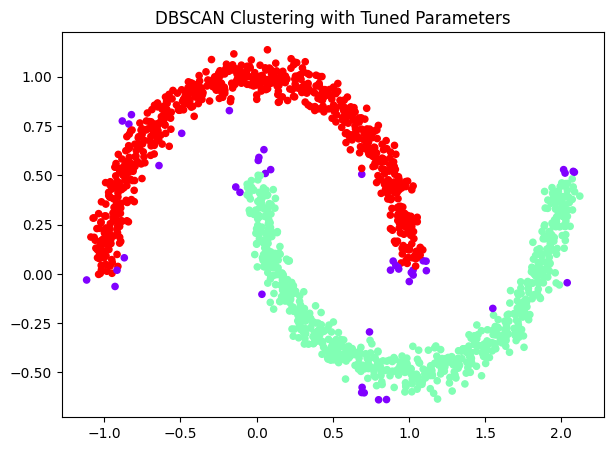

Silhouette Score: 0.3497
Davies-Bouldin Index: 1.1176
Calinski-Harabasz Score: 1027.4352


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# 1. Load dataset (synthetic moon-shaped data)
X, _ = make_moons(n_samples=1500, noise=0.05, random_state=42)

# 2. Find best eps and min_samples using grid search
best_score = -1
best_params = {}
best_labels = None

for eps in np.arange(0.1, 1.0, 0.05):   # try different eps values
    for min_samples in range(3, 35):    # try different min_samples
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(X)

        mask = labels != -1  # ignore noise
        if len(set(labels[mask])) > 1:  # need at least 2 clusters
            score = silhouette_score(X[mask], labels[mask])
            if score > best_score:
                best_score = score
                best_params = {"eps": eps, "min_samples": min_samples}
                best_labels = labels

print("✅ Best Parameters:", best_params)
print("✅ Best Silhouette Score:", best_score)

# 3. Apply DBSCAN with best parameters
dbscan = DBSCAN(eps=best_params["eps"], min_samples=best_params["min_samples"])
labels = dbscan.fit_predict(X)

# 4. Plot clusters
plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='rainbow', s=20)
plt.title("DBSCAN Clustering with Tuned Parameters")
plt.show()

# 5. Evaluation metrics
mask = labels != -1
if len(set(labels[mask])) > 1:
    sil = silhouette_score(X[mask], labels[mask])
    dbi = davies_bouldin_score(X[mask], labels[mask])
    chi = calinski_harabasz_score(X[mask], labels[mask])
    print(f"Silhouette Score: {sil:.4f}")
    print(f"Davies-Bouldin Index: {dbi:.4f}")
    print(f"Calinski-Harabasz Score: {chi:.4f}")
else:
    print("Not enough clusters found for evaluation.")


---

## 2. OPTICS (Ordering Points To Identify Clustering Structure)

### Introduction

OPTICS is also a **density-based algorithm**, but unlike DBSCAN it can detect **clusters of varying density**.
It produces a **reachability plot** to represent cluster structure.

---

### Key Concepts

* **Core Distance:** Minimum radius needed for a point to be a core.
* **Reachability Distance:** Distance that describes how a point can be reached from another.
* **Reachability Plot:** A visual tool to extract clusters.

---

### How OPTICS Works

1. Compute **core distances** for all points.
2. Visit points ordered by reachability distance.
3. Build a **reachability plot**.
4. Extract clusters by identifying valleys in the plot.

---

### Pros & Cons
**Advantages**

* Handles variable density well.
* No fixed `eps` required.
* Produces a hierarchy of clusters.

**Limitations**

* Slower than DBSCAN.
* Requires interpretation of reachability plot.

---


---

## 3. Quick Comparison: DBSCAN vs. OPTICS

| Feature                  | DBSCAN               | OPTICS                                  |
| ------------------------ | -------------------- | --------------------------------------- |
| Requires k?              | ❌ No                 | ❌ No                                    |
| Handles variable density | ❌ Weak               | ✅ Strong                                |
| Parameters               | `eps`, `min_samples` | `min_samples`, `xi`, `min_cluster_size` |
| Output                   | Cluster labels only  | Hierarchy via reachability plot         |
| Outlier detection        | ✅ Yes                | ✅ Yes                                   |

---

```

✅ Best Parameters: {'min_samples': 9, 'xi': np.float64(0.06999999999999999)}
✅ Best Silhouette Score: 0.8385465806641624


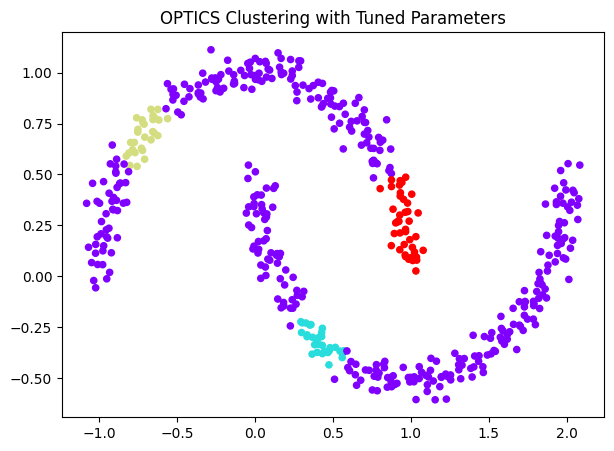

Silhouette Score: 0.8385
Davies-Bouldin Index: 0.2218
Calinski-Harabasz Score: 2136.1669


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import OPTICS
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# 1. Load dataset
X, _ = make_moons(n_samples=500, noise=0.05, random_state=42)

# 2. Grid search for best min_samples & xi
best_score = -1
best_params = {}
best_labels = None

for min_samples in range(3, 15):   # vary min_samples
    for xi in np.arange(0.01, 0.2, 0.02):   # vary xi (steepness threshold)
        model = OPTICS(min_samples=min_samples, xi=xi, min_cluster_size=0.05)
        labels = model.fit_predict(X)

        mask = labels != -1  # ignore noise
        if len(set(labels[mask])) > 1:  # need at least 2 clusters
            score = silhouette_score(X[mask], labels[mask])
            if score > best_score:
                best_score = score
                best_params = {"min_samples": min_samples, "xi": xi}
                best_labels = labels

print("✅ Best Parameters:", best_params)
print("✅ Best Silhouette Score:", best_score)

# 3. Apply OPTICS with best parameters
optics = OPTICS(min_samples=best_params["min_samples"], xi=best_params["xi"], min_cluster_size=0.05)
labels = optics.fit_predict(X)

# 4. Plot clusters
plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='rainbow', s=20)
plt.title("OPTICS Clustering with Tuned Parameters")
plt.show()

# 5. Evaluation metrics
mask = labels != -1
if len(set(labels[mask])) > 1:
    sil = silhouette_score(X[mask], labels[mask])
    dbi = davies_bouldin_score(X[mask], labels[mask])
    chi = calinski_harabasz_score(X[mask], labels[mask])
    print(f"Silhouette Score: {sil:.4f}")
    print(f"Davies-Bouldin Index: {dbi:.4f}")
    print(f"Calinski-Harabasz Score: {chi:.4f}")
else:
    print("Not enough clusters found for evaluation.")
